RF
Accuracy: 0.7417582417582418
Precision: 0.7619047619047619
Recall: 0.9032258064516129
F1 Score: 0.8265682656826568
Confusion Matrix:
 [[ 23  35]
 [ 12 112]]
NB
Accuracy: 0.6923076923076923
Precision: 0.7741935483870968
Recall: 0.7741935483870968
F1 Score: 0.7741935483870968
Confusion Matrix:
 [[30 28]
 [28 96]]
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on test set: 0.7362637362637363
SVM
Accuracy: 0.7362637362637363
Precision: 0.7435897435897436
Recall: 0.9354838709677419
F1 Score: 0.8285714285714286
Confusion Matrix:
 [[ 18  40]
 [  8 116]]


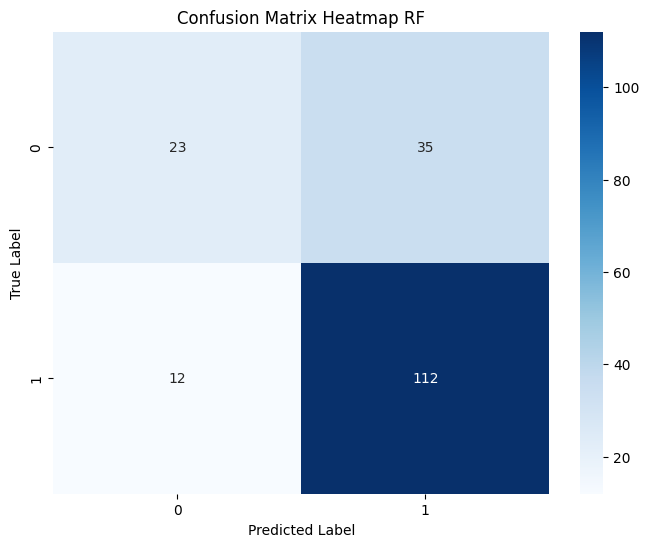

Accuracy_rf: 74.1758


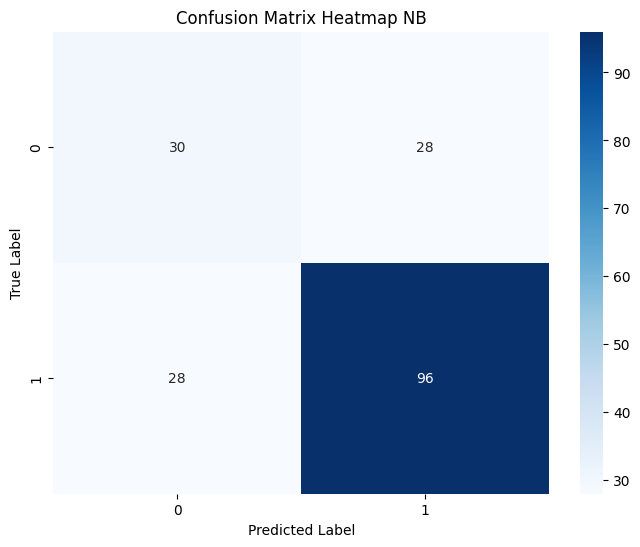

Accuracy_nb: 69.2308


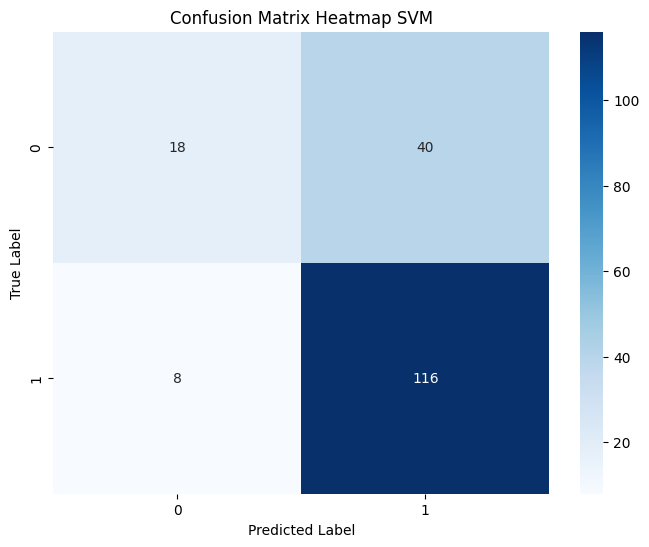

Accuracy_svm: 73.6264


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



# Load the dataset
url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(url)

# Display basic info
data.head()
# Define the features and target
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Check for class imbalance and compute weights
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_res, y_res = smote.fit_resample(X, y)


scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)






#Random forest


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_model.fit(scaler.fit_transform(X_train), y_train)
# Make predictions
y_pred = rf_model.predict(X_test_scaled)
# Calculate performance metrics

print("RF")
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", conf_matrix_rf)







#Navie bayes

# Initialize the Gaussian Naive Bayes model
class_prior = [0.32, 0.68]  # Example: Adjust based on class distribution
model = GaussianNB(priors=class_prior)

# Train the model
model.fit(scaler.fit_transform(X_train), y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("NB")
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
conf_matrix_nb = confusion_matrix(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Confusion Matrix:\n", conf_matrix_nb)







#Support Vector Machine

pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_res_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf']
}



grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_res_pca, y_train_res)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Train the SVM model using the best hyperparameters
svm_model = grid_search.best_estimator_
svm_model.fit(X_train_res_pca, y_train_res)

# Evaluate the model
y_pred = svm_model.predict(X_test_pca)


# Evaluate the model
#print(f"Accuracy on test set: {svm_model.score(X_test_pca, y_test)}")
print(f"Accuracy on test set: {svm_model.score(X_test_pca, y_test)}")

print("SVM")
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Confusion Matrix:\n", conf_matrix_svm)



#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap RF')
plt.show()
print("Accuracy_rf:", round(accuracy_rf * 100, 4))

#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap NB')
plt.show()
print("Accuracy_nb:", round(accuracy_nb * 100, 4))


#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap SVM')
plt.show()
print("Accuracy_svm:", round(accuracy_svm * 100, 4))


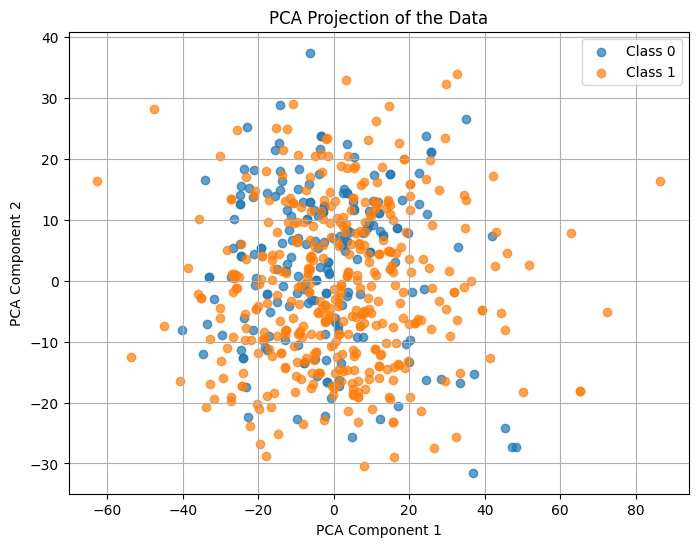

Accuracy with Linear SVM: 0.6813
Accuracy with rbf SVM: 0.6813


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(url)

X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Reduce dimensions using PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
for label in [0, 1]:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.7)
plt.title("PCA Projection of the Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


# Train a linear SVM and evaluate accuracy
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
accuracy_linear = svm_linear.score(X_test, y_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with Linear SVM: {accuracy_linear:.4f}")
print(f"Accuracy with rbf SVM: {accuracy_rbf:.4f}")

<Axes: >

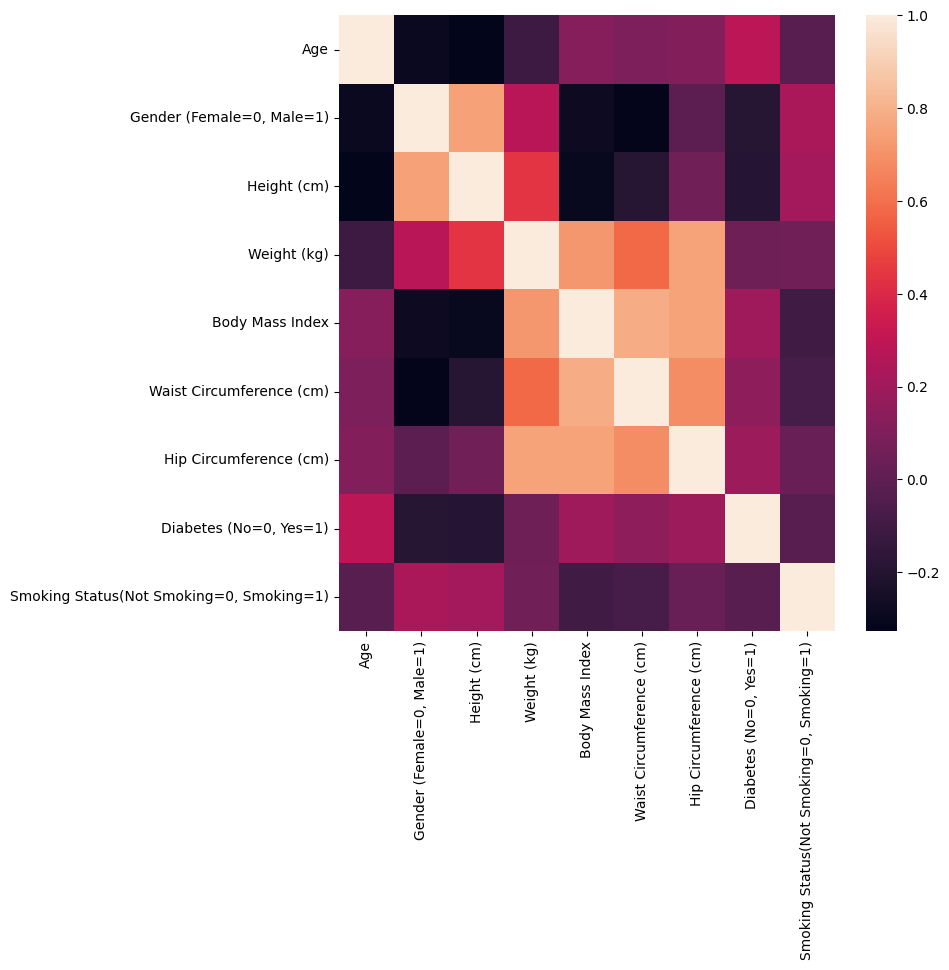

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr())
